## CIFAR 10

In [4]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

In [5]:
from fastai.conv_learner import *
PATH = "data/cifar10/"
os.makedirs(PATH,exist_ok=True)

### Downloading CIFAR 10

In [18]:
from fastai import io

cifar10.tgz: 168MB [00:44, 3.80MB/s]                              


In [19]:
import tarfile

In [21]:
def untar_file(file_path, save_path):
    if file_path.endswith('.tar.gz') or file_path.endswith('.tgz'):
        obj = tarfile.open(file_path)
        obj.extractall(save_path)
        obj.close()
        os.remove(file_path)

In [23]:
cifar_url = 'http://files.fast.ai/data/cifar10.tgz' # faster download
# cifar_url = 'http://pjreddie.com/media/files/cifar.tgz'

io.get_data(cifar_url, 'data/cifar10.tgz')
untar_file('data/cifar10.tgz', 'data/')

### Load classes

In [27]:
classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
stats = (np.array([ 0.4914 ,  0.48216,  0.44653]), np.array([ 0.24703,  0.24349,  0.26159]))

In [28]:
def get_data(sz,bs):
    tfms = tfms_from_stats(stats, sz, aug_tfms=[RandomFlip()], pad=sz//8)
    return ImageClassifierData.from_paths(PATH, val_name='test', tfms=tfms, bs=bs)

In [29]:
bs=128

### Look at data

In [30]:
data = get_data(32,4)

In [31]:
x,y=next(iter(data.trn_dl))

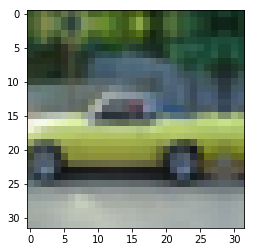

In [32]:
plt.imshow(data.trn_ds.denorm(x)[0]);

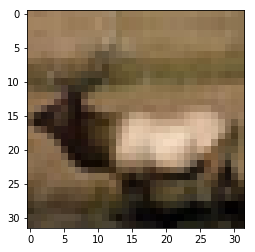

In [33]:
plt.imshow(data.trn_ds.denorm(x)[1]);

## Initial model

In [34]:
from fastai.models.cifar10.resnext import resnext29_8_64

m = resnext29_8_64()
bm = BasicModel(m.cuda(), name='cifar10_rn29_8_64')

In [35]:
data = get_data(8,bs*4)

In [36]:
learn = ConvLearner(data, bm)
learn.unfreeze()

In [37]:
lr=1e-2; wd=5e-4

In [38]:
learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      3.374347   32163488.0 0.097656  



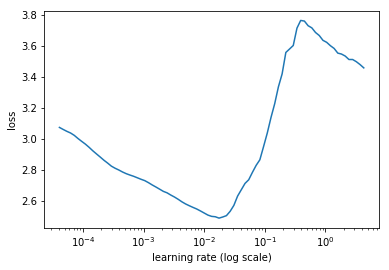

In [39]:
learn.sched.plot()

In [40]:
%time learn.fit(lr, 1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.79189    1.593118   0.424127  

CPU times: user 1min 5s, sys: 21.9 s, total: 1min 27s
Wall time: 1min 14s


[1.5931176, 0.42412683814764024]

In [41]:
%time learn.fit(lr, 2, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=2), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.490596   1.401671   0.490648  
    1      1.404959   1.346798   0.517705                 



[1.3467983, 0.5177045047283173]

In [42]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

HBox(children=(IntProgress(value=0, description='Epoch', max=7), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                 
    0      1.331992   1.318793   0.527619  
    1      1.335391   1.309586   0.531089                 
 21%|██▏       | 21/98 [00:16<00:59,  1.29it/s, loss=1.29]

KeyboardInterrupt: 

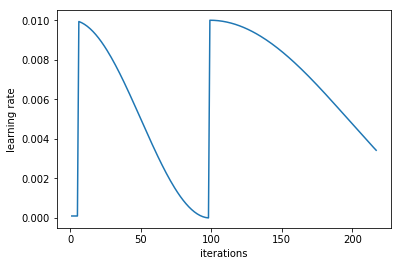

In [44]:
learn.sched.plot_lr()

In [ ]:
learn.save('8x8_8')

## 16x16

In [30]:
learn.load('8x8_8')

In [13]:
learn.set_data(get_data(16,bs*2))

In [14]:
%time learn.fit(1e-3, 1, wds=wd)

A Jupyter Widget

[ 0.       5.14421  5.90379  0.28985]                       



In [15]:
learn.unfreeze()

In [16]:
learn.lr_find()

A Jupyter Widget

[   0.         2.28283  966.72705    0.09523]               



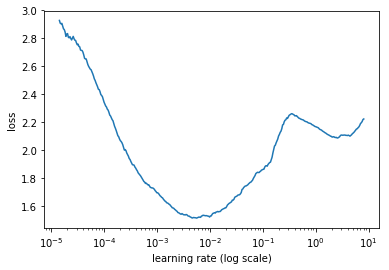

In [17]:
learn.sched.plot()

In [18]:
lr=1e-2

In [19]:
%time learn.fit(lr, 2, cycle_len=1, wds=wd)

A Jupyter Widget

[ 0.       1.38133  1.36374  0.51137]                       
[ 1.       1.13313  1.14011  0.60384]                       



In [20]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

A Jupyter Widget

[ 0.       0.98926  0.98239  0.6605 ]                        
[ 1.       0.9254   0.93705  0.67257]                        
[ 2.       0.75597  0.785    0.72646]                        
[ 3.       0.84544  0.90955  0.68958]                        
[ 4.       0.66637  0.71065  0.75752]                        
[ 5.       0.56253  0.63     0.78066]                        
[ 6.       0.4769   0.60606  0.79114]                        



In [21]:
learn.save('16x16_8')

## 24x24

In [9]:
learn.load('16x16_8')

In [10]:
learn.set_data(get_data(24,bs))

In [11]:
%time learn.fit(1e-2, 1, wds=wd)

A Jupyter Widget

[ 0.       0.61302  0.67112  0.77321]                        



In [12]:
learn.unfreeze()

In [13]:
%time learn.fit(lr, 1, cycle_len=1, wds=wd)

A Jupyter Widget

[ 0.       0.49323  0.51107  0.82698]                        



In [14]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

A Jupyter Widget

[ 0.       0.43563  0.47423  0.8373 ]                        
[ 1.       0.46499  0.51238  0.82282]                        
[ 2.       0.32453  0.40952  0.86141]                        
[ 3.       0.47472  0.62542  0.78919]                        
[ 4.       0.34746  0.43835  0.85566]                        
[ 5.       0.24327  0.37241  0.87728]                        
[ 6.       0.19959  0.35643  0.88214]                        



In [15]:
learn.save('24x24_8')

In [16]:
log_preds,y = learn.TTA()
preds = np.mean(np.exp(log_preds),0)metrics.log_loss(y,preds), accuracy(preds,y)

(0.32011880736219389, 0.89410000000000001)

## 32x32

In [9]:
learn.load('24x24_8')

In [20]:
learn.set_data(get_data(32,bs))

In [21]:
%time learn.fit(1e-2, 1, wds=wd)

A Jupyter Widget

[ 0.       0.28159  0.37857  0.87114]                        



In [22]:
learn.unfreeze()

In [23]:
%time learn.fit(lr, 3, cycle_len=1, cycle_mult=2, wds=wd)

A Jupyter Widget

[ 0.       0.24112  0.3168   0.89587]                        
[ 1.       0.28276  0.38893  0.87342]                        
[ 2.       0.16777  0.29451  0.90378]                        
[ 3.       0.27507  0.57156  0.81695]                        
[ 4.       0.20369  0.35616  0.88786]                        
[ 5.       0.12198  0.2949   0.90437]                        
[ 6.       0.08032  0.27401  0.91169]                         



In [26]:
%time learn.fit(lr, 3, cycle_len=4, wds=wd)

A Jupyter Widget

[ 0.       0.23548  0.43751  0.86086]                         
[ 1.       0.15057  0.32182  0.89616]                        
[ 2.       0.08559  0.28051  0.91218]                         
[ 3.       0.05464  0.26494  0.91555]                         
[ 4.       0.18577  0.4403   0.86541]                        
[ 5.       0.11875  0.32632  0.89943]                        
[ 6.       0.06624  0.26536  0.91911]                         
[ 7.       0.03661  0.26202  0.92059]                         
[ 8.       0.16668  0.39448  0.87718]                        
[ 9.       0.09441  0.31163  0.9019 ]                         
[ 10.        0.0395    0.26366   0.92   ]                     
[ 11.        0.02982   0.25696   0.92375]                     



In [27]:
log_preds,y = learn.TTA()
metrics.log_loss(y,np.exp(log_preds)), accuracy(log_preds,y)

(0.22727449907067793, 0.93049999999999999)

In [ ]:
learn.save('32x32_8')